### Importing the packages

In [1]:
#import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, plot_roc_curve
from sklearn import metrics
import sklearn
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.23.2.


### Importing the dataset

In [2]:
df = pd.read_csv('COVID-19/covid_final_data.csv')

### Dataset Attributes


In [3]:
df.columns

Index(['AGE', 'GENDER', 'FEVER', 'DRY-COUGH', 'FATIGUE', 'PAINS', 'ANOSMIA',
       'SHORTNESS_OF_BREATH', 'RUNNY_NOSE', 'HEADACHE', 'DIARRHEA', 'CHILLS',
       'LIVES_IN_AFFECTED_AREA', 'NAUSEA', 'HIGH-TEMPERTURE',
       'COVID19_OUTPUT'],
      dtype='object')

**Patient's Attribute**

```
1. Age: Patient's Age
2. Gender: Male(1) or Female (0)
3. Fever: Yes(1) or No(0)
4. Cough: Yes(1) or No(0)
5. Fatigue: Yes(1) or No(0)
6. Pains: Yes(1) or No(0)
7. Nasal Congestion: Yes(1) or No(0)
8. Shortness of Breath: Yes(1) or No(0)
9. Runny Nose: Yes(1) or No(0)
10. Sore Throat: Yes(1) or No(0)
11. Diarrhea: Yes(1) or No(0)
12. Chills: Yes(1) or No(0)
13. Headache: Yes(1) or No(0)
14. Vomiting: Yes(1) or No(0)
15. Lives in affected area: Yes(1) or No(0)
---------------------------------------------
16. Covid Output: Yes(1) or No(0)
```

In [4]:
df.head(5)

,AGE,GENDER,FEVER,DRY-COUGH,FATIGUE,PAINS,ANOSMIA,SHORTNESS_OF_BREATH,RUNNY_NOSE,HEADACHE,DIARRHEA,CHILLS,LIVES_IN_AFFECTED_AREA,NAUSEA,HIGH-TEMPERTURE,COVID19_OUTPUT
0,19,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1
1,28,1,1,0,0,0,0,0,0,0,0,0,1,0,1,1
2,35,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1
3,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [5]:
Symptom_Count = df.drop(['AGE', 'GENDER','COVID19_OUTPUT'],axis=1).sum()

In [6]:
Symptom_Count

FEVER                     745
DRY-COUGH                 463
FATIGUE                    64
PAINS                      50
ANOSMIA                    57
SHORTNESS_OF_BREATH        66
RUNNY_NOSE                 67
HEADACHE                  142
DIARRHEA                   32
CHILLS                     51
LIVES_IN_AFFECTED_AREA    238
NAUSEA                     37
HIGH-TEMPERTURE           595
dtype: int64

### Confusion Matrix

In [7]:
corrMatrix = df.corr(method='spearman')
df.corr()

,AGE,GENDER,FEVER,DRY-COUGH,FATIGUE,PAINS,ANOSMIA,SHORTNESS_OF_BREATH,RUNNY_NOSE,HEADACHE,DIARRHEA,CHILLS,LIVES_IN_AFFECTED_AREA,NAUSEA,HIGH-TEMPERTURE,COVID19_OUTPUT
AGE,1.000000,0.074382,0.022943,0.047645,0.097993,0.081185,0.130204,-0.031658,-0.021785,-0.105755,-0.048191,0.023023,0.016395,0.022586,-0.000310,0.006081
GENDER,0.074382,1.000000,0.053795,0.003112,-0.048996,-0.010474,0.011494,-0.016308,-0.052529,-0.062823,0.017050,-0.014599,-0.022730,0.025970,0.212699,0.013788
FEVER,0.022943,0.053795,1.000000,0.191755,-0.005902,0.060148,0.004159,-0.123018,0.010423,0.001083,0.009738,-0.017796,-0.068020,-0.020995,0.187202,0.529185
DRY-COUGH,0.047645,0.003112,0.191755,1.000000,-0.027305,0.052422,0.070611,-0.080566,0.029718,0.019849,0.020887,-0.030242,0.056511,0.014351,-0.030356,0.218632
FATIGUE,0.097993,-0.048996,-0.005902,-0.027305,1.000000,0.015797,-0.007595,-0.045449,-0.029837,0.010381,0.037218,0.033071,0.007328,0.008849,-0.016685,0.070014
PAINS,0.081185,-0.010474,0.060148,0.052422,0.015797,1.000000,0.040673,0.014355,0.031633,-0.009506,0.023900,-0.034958,-0.030098,-0.005686,-0.037240,0.057166
ANOSMIA,0.130204,0.011494,0.004159,0.070611,-0.007595,0.040673,1.000000,-0.042787,-0.043125,-0.040672,0.042957,0.020311,-0.048444,-0.009234,0.066466,0.077812
SHORTNESS_OF_BREATH,-0.031658,-0.016308,-0.123018,-0.080566,-0.045449,0.014355,-0.042787,1.000000,-0.046551,-0.047411,-0.009285,-0.022450,-0.093514,-0.034236,0.024829,0.016807
RUNNY_NOSE,-0.021785,-0.052529,0.010423,0.029718,-0.029837,0.031633,-0.043125,-0.046551,1.000000,0.062148,0.146668,-0.040708,-0.005887,0.007113,-0.017605,0.013413
HEADACHE,-0.105755,-0.062823,0.001083,0.019849,0.010381,-0.009506,-0.040672,-0.047411,0.062148,1.000000,0.015141,0.064801,0.052343,0.065870,-0.030366,-0.008681


### Visual Representation of Confusion Matrix

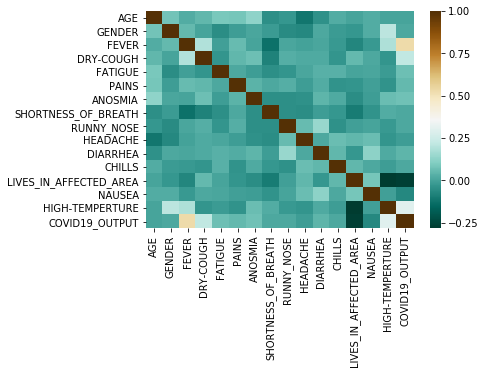

In [8]:
sns.heatmap(corrMatrix,cmap = "BrBG_r" )
plt.rcParams["figure.figsize"] = [15,8]
plt.show()

### Visual Analysis of Common Symptoms

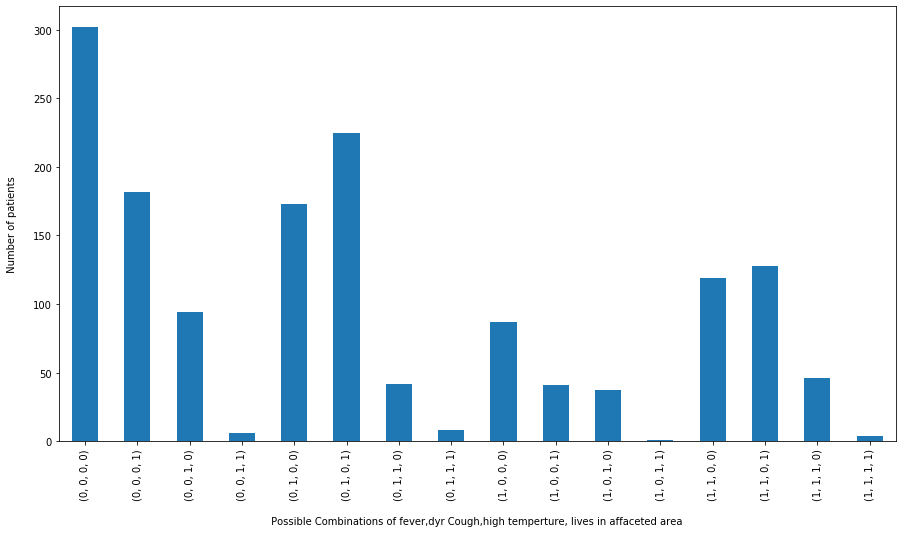

In [9]:
plt.clf()
plt.rcParams["figure.figsize"] = [10,5]
df.groupby(['DRY-COUGH','FEVER','LIVES_IN_AFFECTED_AREA','HIGH-TEMPERTURE']).size().plot(kind='bar')
plt.xlabel("\n Possible Combinations of fever,dyr Cough,high temperture, lives in affaceted area ")
plt.ylabel(" Number of patients \n")
plt.show()

#### Seperating the independent and target variables

In [10]:
X = df.iloc[:,0:15].values

y = df.iloc[:,15].values

#### Spliting the dataset into test and train

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#### Creating Different Models

In [12]:
rfc = RandomForestClassifier(n_estimators=15,random_state=42)
dt = DecisionTreeClassifier(random_state=42)
svr = LinearSVC(random_state=42)
lr = LogisticRegression(random_state=42)
#---------------------------
lr.fit(X_train,y_train)
rfc.fit(X_train,y_train)
dt.fit(X_train,y_train)
svr.fit(X_train,y_train)


LinearSVC(random_state=42)

### Area Under Curve Analysis

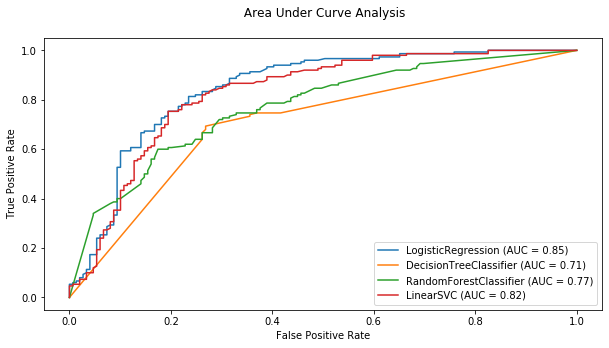

In [13]:
plt.rcParams["figure.figsize"] = [10,5]
disp = plot_roc_curve(lr,X_test,y_test)
plt.title(' Area Under Curve Analysis\n')
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svr,X_test,y_test,ax=disp.ax_)



#### Deliberation

As LogisticRegression is having high AUC values among all the algorithms, so, the LR selected to make the predictions for the COVID-19 Infection Probability.

**_data_input_**: List holding the values of the given symptoms and patient's attributes.

##### Case 1: Considering a male patient of 32years of age and having no symptoms at all

In [14]:
data_input = [32,1,0,0,0,0,0,0,0,0,0,0,0,0,0] 
result = (lr.predict_proba([data_input]))
result = round(result[0][1]*100,2)
print(f"COVID19 Infection Probability: {result}%")
pickle.dump(lr, open("model.pkl","wb+"))

COVID19 Infection Probability: 14.6%


##### Case 2: Considering a female patient of 67years of age and having fever,high temperture,dry cough,lives in affected area

In [15]:
data_input = [67,0,0,1,1,0,0,0,0,0,0,0,1,0,1] 
result = (lr.predict_proba([data_input]))
result = round(result[0][1]*100,2)
print(f"COVID19 Infection Probability: {result}%")

COVID19 Infection Probability: 38.08%


&nbsp;